## Introduksjon til klassifisering

## Hva er klassifisering?
Klassifisering er en form for maskinlæringsproblem der man ønsker å trene maskinen til å finne hvilken kategori (*klasse*) noe hører til. Tenk for eksempel at du er en  maskin og jeg skal trene deg til å plukke ut bøker som jeg liker. Det første vi må gjøre er å representere bøkene med tall. For eksempel kan jeg ha hvor skummel en bok er på x aksen og hvor morsom den er på y aksen. Da kan vi plotte det opp i et scatterplot slik:

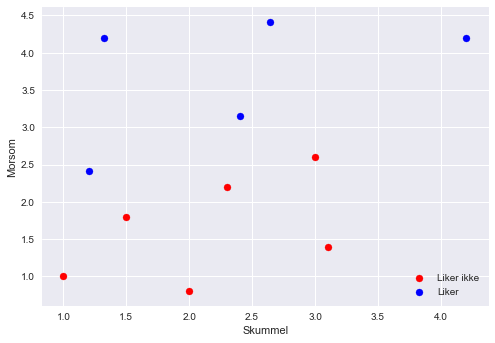

In [1]:
# importere read_csv fra pandas pakken
from pandas import *
# importere pakker for plotting
import matplotlib.pyplot as plt
import seaborn

# bruke read_csv til å lese inn tabellen
data = read_csv('../../datasets/small_examples/books.csv') # Lese inn data

# lagre hver av klassene i egen variabel.
# dette er egentlig ikke nødvendig, men det gjør det lettere å tegne 
# merkelapper for hver klasse
data_klasse1 = data.loc[data['Klasse'] == 0] 
data_klasse2 = data.loc[data['Klasse'] == 1]

# plotte bøkene jeg ikke liker som rød sirkler med merkelappen "Liker ikke"
plt.scatter(data_klasse1['Skummel'], data_klasse1['Morsom'], c='r', label='Liker ikke')

# plotte bøkene jeg liker som blå sirkler med merkelappen "Liker"
plt.scatter(data_klasse2['Skummel'], data_klasse2['Morsom'], c='b', label='Liker')

# lable aksene
plt.xlabel('Skummel')
plt.ylabel('Morsom')

# tegne opp merkelapper for klassene
plt.legend()

# vise frem figuren
plt.show()

De blå punktene er bøker som jeg liker og de røde punktene er bøker jeg ikke liker. Du ser kanskje at det er et mønster her? La oss si at jeg kommer med en ny, ukjent bok som er middels skummel og veldig lite morsom. (Representert i plottet under som et spørsmåltegn)


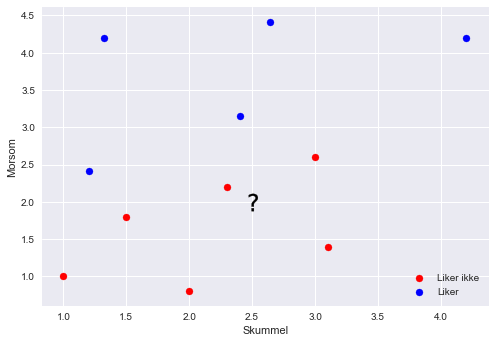

In [2]:
# lage en ny figure
plt.figure()

# plotte bøkene jeg ikke liker som rød sirkler med merkelappen "Liker ikke"
plt.scatter(data_klasse1['Skummel'], data_klasse1['Morsom'], c='r', label='Liker ikke')

# plotte bøkene jeg liker som blå sirkler med merkelappen "Liker"
plt.scatter(data_klasse2['Skummel'], data_klasse2['Morsom'], c='b', label='Liker')

# plotte en ny bok representert av et spørsmåltegn
plt.scatter(2.5,2, c='k',s=300,marker='$?$')

# lable aksene
plt.xlabel('Skummel')
plt.ylabel('Morsom')

# tegne opp merkelapper for klassene
plt.legend()

# vise frem figuren
plt.show()

**Oppgave 1:** Tror du at jeg kommer til å like eller ikke like boken? Hvorfor? Fyll inn svar i cellen under

*Ditt svar her:*



**Oppgave 2:** Hva om jeg har en bok representert av punktet (2.0,3.6)? Kommer jeg til å like eller ikke like boken?

*Ditt svar her:*

Men å se på plottet og avgjøre manuelt hvilken klasse et eksempel tilhører, er ikke spesielt presist. Det vi ønsker er å finne en måte for maskinen å lære å bestemme klassen til et eksempel basert på egenskaper

## Nærmeste Nabo

En enkel måte å finne hvilken klasse et eksempel tilhører, er å se på *det nærmeste kjente eksempelet*. Det er rimelig å anta at ting som er like har samme klasse. Hvis jeg for eksempel finner en ny bok, og den er ganske lik som en annen bok jeg liker, er det sannsynlig at jeg vil like den nye boka også. 
Så en mulig taktikk for å klassifisere et nytt punkt, `x_ny`, er å først finne det nærmeste andre punktet, `x_nabo`. Så kan vi sjekke hvilken klasse det har, og så si at klassen til `x_ny` er den samme som klassen til `x_nabo`. Med andre ord: Hvis den nye boka ligner mest på en bok jeg vet jeg liker, så gjetter vi at jeg liker den nye boka også! Denne algoritmen kaller vi *Nærmeste Nabo*

**Oppgave 3:** Ta en titt på figuren over igjen. Hvilket punkt er den nærmeste naboen til det ukjente punktet? Hvilken klasse får det ukjente punktet da?

*Ditt svar her:*

## K Nærmeste Naboer
Hva om det plutselig er en middels skummel og lite morsom bok som jeg plutselig liker, selv om jeg vanligvis ikke gjør det? Da kan plottet vårt for eksempel se slikt ut

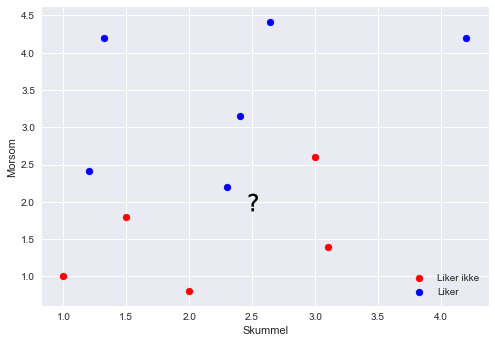

In [3]:
# lage en ny figure
plt.figure()

# Endre et klassen til et datapunkt
data.loc[8]['Klasse'] = 1

# hente ut hver klasse i egen variabel for plotting
data_klasse1 = data.loc[data['Klasse'] == 0] 
data_klasse2 = data.loc[data['Klasse'] == 1]

# plotte bøkene jeg ikke liker som rød sirkler med merkelappen "Liker ikke"
plt.scatter(data_klasse1['Skummel'], data_klasse1['Morsom'], c='r', label='Liker ikke')

# plotte bøkene jeg liker som blå sirkler med merkelappen "Liker"
plt.scatter(data_klasse2['Skummel'], data_klasse2['Morsom'], c='b', label='Liker')

# plotte en ny bok representert av et spørsmåltegn
plt.scatter(2.5,2,c='k',s=300,marker='$?$')

# lable aksene
plt.xlabel('Skummel')
plt.ylabel('Morsom')

# tegne opp merkelapper for klassene
plt.legend()

# vise frem figuren
plt.show()

** Oppgave 4: ** Hvilken klasse vil spørsmåltegnet få nå? Virker det rimelig?

*Ditt svar her*

Som vi ser er Nærmeste Nabo algoritmen følsom for "støy" i dataene. En bok som er litt annerledes vil påvirke anbefalingen av fremtidige bøker. En måte å komme rundt dette på, er å **spørre mer enn en nabo.** Hvis vi for eksempel spør de tre nærmeste naboene, vil vi i dette tilfellet få ("liker", "liker ikke", "liker ikke"). Det er et flertall av "liker ikke", så vi setter `x_ny` til å også få klassen "liker ikke". Dette kalles *K nærmeste nabo algoritmen* hvor k er antallet nærmeste naboer vi spør. Det er gjerne sånn at dersom vi spør flere naboer, så blir vi sikrere, men hvis vi spør for mange kan det også gå galt. 

I det mest ekstreme tilfellet vil vi spørre alle punktene og da vil vi alltid ende opp med klassen som flest punkter tilhører. I vårt eksempel vil alle bøker få klassen "liker" siden det er flest punkter i den klassen. 
Det å finne den riktige balansen mellom høy og lav k er et eksempel på en av de viktigste utfordringene i maskinlæring, nemlig valg av parametere. Vi skal snakke mer om det siden. 

## KNN i kode

Hvis du har kjennskap til programmering fra før har du kanskje begynt å tenke hvordan KNN kan skrives i kode. Jeg anbefaler alle som har lyst til å prøve å implementere algoritmen selv til å gjøre det. Det er veldig lærerikt og alt man trenger å gjøre er å søke gjennom alle punkter, finne de k nærmeste punktene og telle opp hvilken klasse som har flertall blant de. 

Men i dette kurset skal vi bruke scikit learn sin ferdige klasse for K Nærmeste Naboer. Den brukes veldig likt som vi gjorde for lineær regresjon:

In [4]:
from sklearn.neighbors import KNeighborsClassifier # importere klassifikator 
clf = KNeighborsClassifier(n_neighbors=3) # Lage KNN klassifikator med k=3
clf.fit(data[['Skummel','Morsom']],data['Klasse']) # Trene klassifikatoren

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

Når vi har trent klassifikatoren med `clf.fit(x,y)` kan vi klassifisere nye eksempler med `clf.predict(x_ny)`. 

In [5]:
clf.predict([[2.5,2]])

array([ 0.])

Som forventet ble det ukjente punktet klassifisert som `0` ("ikke liker") av KNN med `k=3`

## Overtilpassing

Akkurat som for regresjon, kan *overtilpassing* være et problem. Spesielt hvis eksemplene overlapper litt. Sett at vi har følgende data. 

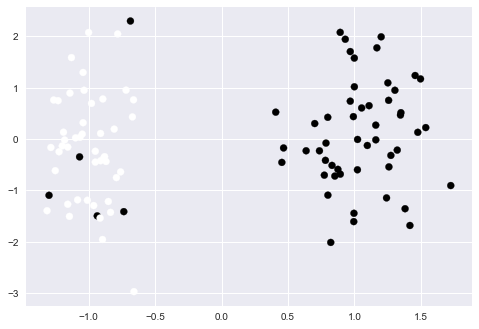

In [6]:
# lag ny figur
plt.figure()

# les inn eksempeldata
example_data = read_csv('../../datasets/small_examples/example1.csv')

# hvis eksempeldata i et scatterplott
plt.scatter(example_data['0'],example_data['1'],c=example_data['2'])
plt.show()

Hvilken av de to skillene under tror du passer best?

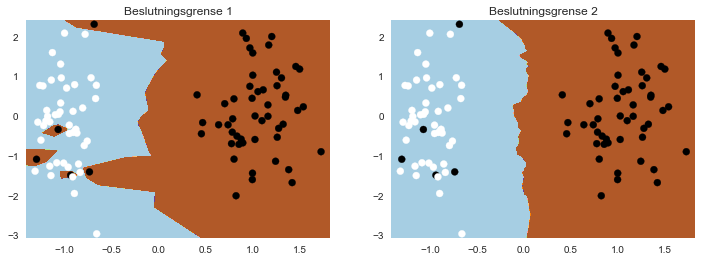

In [7]:
# Vi må importere litt for å kunne bruke hjelpefunksjoner
import sys
import os
sys.path.append(os.path.split(os.path.abspath(os.getcwd()))[0])
from useful_tools import plot_boundary

# opprette en ny figur som er 12 i bredden og 4 i høyden
plt.figure(figsize=(12, 4))

# Opprette en KNN klassifikator med k=1
clf1 = KNeighborsClassifier(n_neighbors = 1)
# trene klassifikatoren
clf1.fit(example_data[['0','1']],example_data['2'])
# opprette et subplot for å ha to plott ved siden av hverandre
plt.subplot(1,2,1)
# plot_boundary er en hjelpefunksjon som plotter beslutnigsgrensa for en modell
plot_boundary(example_data[['0','1']],clf1,padding=0.1,plot_step=0.005)
# tegn opp datapunktene
plt.scatter(example_data['0'],example_data['1'],c=example_data['2'])
plt.title('Beslutningsgrense 1')

# Opprette en KNN klassifikator med k=10
clf2 = KNeighborsClassifier(n_neighbors = 10)
# trene klassifikatoren
clf2.fit(example_data[['0','1']],example_data['2'])
# opprette et subplot for å ha to plott ved siden av hverandre
plt.subplot(1,2,2)
# plot_boundary er en hjelpefunksjon som plotter beslutnigsgrensa for en modell
plot_boundary(example_data[['0','1']],clf2,padding=0.1,plot_step=0.005)
# tegn opp datapunktene
plt.scatter(example_data['0'],example_data['1'],c=example_data['2'])
plt.title('Beslutningsgrense 2')
plt.show()

Beslutningsgrense 1 passer perfekt til dataen, men den er veldig detaljert og kronglete. Den virker ikke som den *generaliserer bra til ukjent data*. Beslutningsgrense 2 passer litt dårligere men den er mer generell. 

Så for å måle hvor bra en klassifiseringsmodell er, er det svært viktig at vi deler inn i trening og testdata. 

**Oppgave 5:** Bruk alt du har lært om KNN til å klassifisere et nytt datasett

Begynn med å lese inn data fra `'../../datasets/small_examples/example2.csv'`

In [8]:
df2 = read_csv('../../datasets/small_examples/example2.csv') 
df2.head()

,0,1,2
0,0.310603,-1.816729,1.0
1,0.328795,0.988507,1.0
2,-1.778519,0.423378,0.0
3,-0.351524,1.056040,0.0
4,1.811545,0.497164,1.0


Splitt inn i trening og testdata med `train_test_split`

In [9]:
from sklearn.model_selection import train_test_split

###### din kode her: ######
train_data, test_data,train_target, test_target = train_test_split(df2[['0','1']], df2['2'], test_size=0.33, random_state=54)

Lag en klassifikator med `KNeighborsClassifier` og tren den på **trenigsdata** med `.fit(x,y)`

In [10]:
###### din kode her: ######
clf = KNeighborsClassifier(n_neighbors = 3)
clf.fit(train_data,train_target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

Lag en figur som viser treningsdata som sirkler og testdata som kryss. Vis også frem beslutningsgrensa til klassifikatoren din i samme plot. 

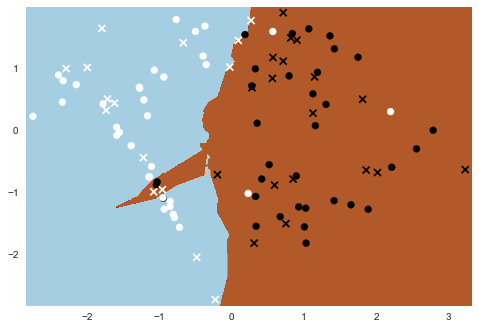

In [11]:
###### din kode her: ######
plt.figure()
plot_boundary(df2,clf,padding=0.1,plot_step=0.005)
plt.scatter(train_data['0'], train_data['1'], marker='o', c=train_target)
plt.scatter(test_data['0'], test_data['1'], marker='x', c=test_target)
plt.show()

Bruk `.predict` til å finne klassene til testdata. Print ut trenings og testnøyaktighet

In [12]:
from sklearn.metrics import mean_squared_error
###### din kode her: ######

predictions_train = clf.predict(train_data) #?
predictions_test= clf.predict(test_data) #?

###### din kode slutt: ######

print("treningsnøyaktighet:", np.mean(clf.predict(train_data)==train_target))
print("testnøyaktighet:", np.mean(clf.predict(test_data)==test_target))

treningsnøyaktighet: 0.940298507463
testnøyaktighet: 0.878787878788


**Oppgave 6:** Prøv å kjøre cellene på nytt med andre verdier av k **(hint: `n_neighbors`)**. Prøv for eksempel k = 1, 10, 30 og 67. Hvilken verdi gir størst testnøyaktighet?

Skriv ditt svar her:

**Oppgave 7:** Hvilken effekt har det på beslutningsgrensa? Hvilken sammenheng har det med test nøyaktigheten?

Skriv ditt svar her:

# Logistisk regresjon

K nærmeste nabo er bare en av mange algoritmer for å klassifisere data basert på egenskaper.
En annen måte å gjøre klassifisering på er å bruke regresjon litt sånn som vi har sett på tidligere i kurset. La oss se på et 1 dimensjonalt eksempel

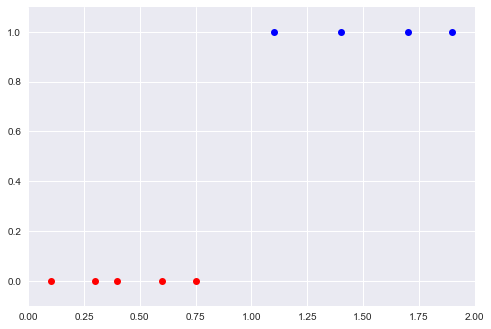

In [13]:
# vi lager litt eksempel data for plotting
x = np.array([0.75,0.1,0.3,0.4,0.6,1.1,1.4,1.7,1.9])
y = np.array([0,  0,  0,  0,  0,1,  1,1,  1])

# henter ut hver klasse i egne variable for plotting
x0 = x[y==0]
y0 = y[y==0]

x1 = x[y==1]
y1 = y[y==1]

# plotte data
plt.figure()
plt.plot(x0,y0,'ro')
plt.plot(x1,y1,'bo')
plt.axis([0,2,-0.1,1.1])
plt.show()

Her er alle eksemplene med klasse "RØD" satt 0 på y aksen og eksemplene med klasse "BLÅ" er satt til 1. Vi ønsker å finne hvor skillet mellom klassene går. Den enkleste løsningen vil være linær regresjon. Alt vi trenger å gjøre er å tilpasse en linje til punktene som før. Så kan vi *terskle* linja. Det betyr at vi kan si at der linja er over en hvis grense. f.eks 0.5 er det klasse "BLÅ" og ellers er det klasse "RØD"

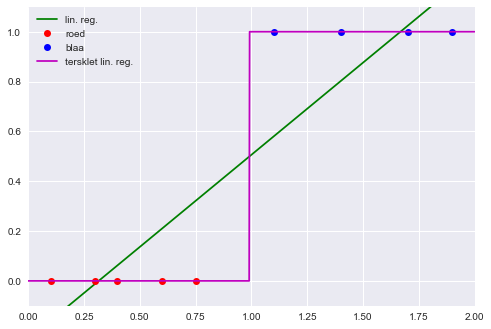

In [14]:
# importere LinearRegression
from sklearn.linear_model import LinearRegression 

# lage og trene modellen
reg = LinearRegression()
reg.fit(x[:,np.newaxis],y[:,np.newaxis])

# lage en linje for plotting
t = np.linspace(0,2,1001)
l = reg.predict(t[:,np.newaxis])

plt.figure() # opprette ny figur
plt.plot(t,l,'g-') # tegne modellen som linje
plt.plot(x0,y0,'ro') # tegne den røde klassen
plt.plot(x1,y1,'bo') # tegne den blå klassen 
plt.axis([0,2,-0.1,1.1]) # justere aksene
plt.plot(t,l>=0.5,'m-')
plt.legend(['lin. reg.','roed','blaa','tersklet lin. reg.'],loc=2)
plt.show()

Hvis man nå vil finne klassen til et nytt punkt, f.eks. 1.2, sjekker man først hvilken verdi man får for den grønne linja. I vårt tilfelle er det ca. 0.7. Så sjekker man om det er over terskelen på 0.5. Hvilket det er. Da bestemmer man at klassen er "BLÅ". 

Eventuelt kan man se direkte på den lilla linja som representerer resultatet av tersklingen. Matematisk blir dette det samme. 

Et problem er at linja passer ganske dårlig til dataene og vil bli veldig forskjellig allerede hvis vi legger til et lite punkt. 

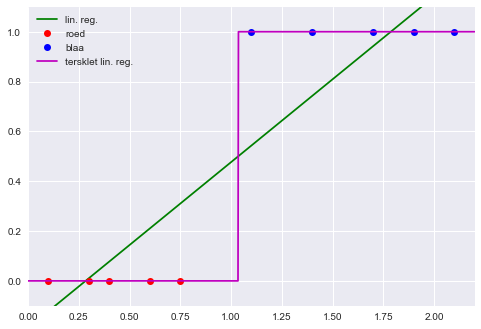

In [15]:
x = np.array([0.75,0.1,0.3,0.4,0.6,1.1,1.4,1.7,1.9,2.1])
y = np.array([0,  0,  0,  0,  0,1,  1,1,  1,1])

x0 = x[y==0]
y0 = y[y==0]

x1 = x[y==1]
y1 = y[y==1]

# lage og trene modellen
reg = LinearRegression()
reg.fit(x[:,np.newaxis],y[:,np.newaxis])

# lage en linje for plotting
t = np.linspace(0,2.2,1001)
l = reg.predict(t[:,np.newaxis])

plt.figure() # opprette ny figur
plt.plot(t,l,'g-') # tegne modellen som linje
plt.plot(x0,y0,'ro') # tegne den røde klassen
plt.plot(x1,y1,'bo') # tegne den blå klassen 
plt.axis([0,2.2,-0.1,1.1]) # justere aksene
plt.plot(t,l>=0.5,'m-')
plt.legend(['lin. reg.','roed','blaa','tersklet lin. reg.'],loc=2)
plt.show()

Vi vil helst ikke ha en modell som er så lett påvirket av små endringer i dataene. Heldigvis er det lett å fikse dette problemet. Vi bytter ut den lineære funksjonen med en *logistisk funksjon*. 
Denne terskler vi også på 0.5. En logistisk funksjon passer mye bedre med klassifikasjonsdata

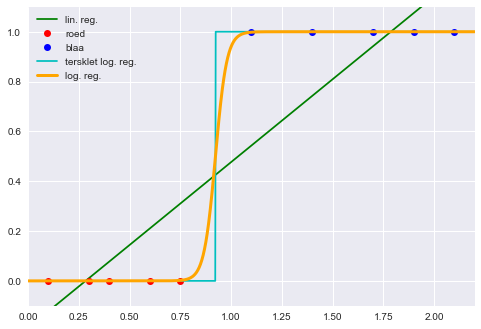

In [16]:
from sklearn.linear_model import LogisticRegression 

reg2 = LogisticRegression(C=1e5)
reg2.fit(x[:,np.newaxis],y)

# Logistisk funksjon er litt utenfor dette kursets tema, så vi har laget en ferdig 
# matematisk funksjon for det. Du trenger ikke å forstå detaljene her
def logistic_model(x):
    return 1 / (1 + np.exp(-x))

loss = logistic_model(t * reg2.coef_ + reg2.intercept_).ravel()

plt.figure() # opprette ny figur
plt.plot(t,l,'g-') # tegne modellen som linje
plt.plot(x0,y0,'ro') # tegne den røde klassen
plt.plot(x1,y1,'bo') # tegne den blå klassen 
plt.plot(t,loss>=0.5,'c-') # plotte terskel
plt.plot(t, loss, color='orange', linewidth=3) # plotte logistisk funksjon

plt.axis([0,2.2,-0.1,1.1]) # justere aksene
plt.legend(['lin. reg.','roed','blaa','tersklet log. reg.','log. reg.'],loc=2)
plt.show()

## Logistisk regresjon for flere dimensjoner
Hittil har vi kun sett på logistisk regresjon klassifisering for en 1-dimensjonal egenskap. Men i praksis har vi gjerne flere egenskaper. Prinsippet er det samme, men i stedet for å tilpasse en linje tilpasser man en høyere dimensjons grense, for eksempel et plan. Under er en figur som viser en 
logistisk regresjons-grense i to dimensjoner

<IPython.core.display.Javascript object>


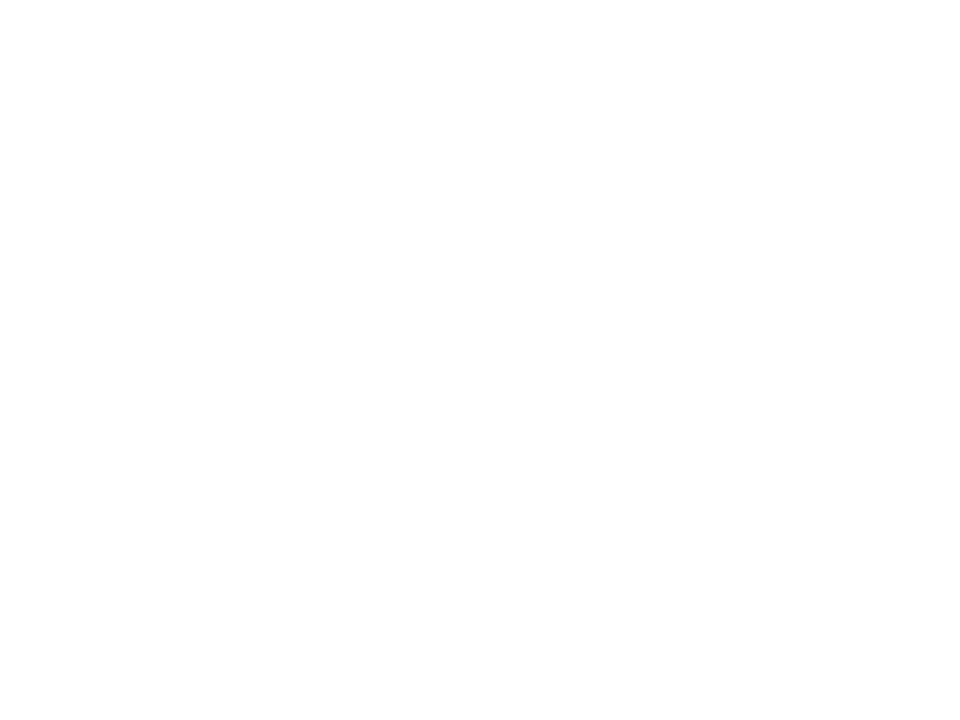

In [17]:
# skru på interaktive plot
% matplotlib notebook 
from mpl_toolkits.mplot3d import Axes3D # importere verktøy for 3d plot

# lage og trene klassifikator
clf_log = LogisticRegression(C=1e5)
clf_log.fit(example_data[['0','1']],example_data['2'])

# lage ny figur og tegne 3d scatterplot
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(example_data['0'][example_data['2']==0], example_data['1'][example_data['2']==0],
           example_data['2'][example_data['2']==0],facecolors='r')
ax.scatter(example_data['0'][example_data['2']==1], example_data['1'][example_data['2']==1],
           example_data['2'][example_data['2']==1],facecolors='b')

# regne ut beslutningsplanet
x = y = np.arange(-4, 4, 0.5)
X, Y  = np.meshgrid(x, y)
def model2d(c,b,x,y):
    return logistic_model(c[0]*x + c[1]*y + b)
Z = model2d(clf_log.coef_[0],clf_log.intercept_,X,Y)

# plotte beslutningsplanet som en wireframe
ax.plot_wireframe(X, Y, Z,color ='k')
plt.show()

Når du terskler beslutningplanet blir det som å kutte med en kniv. Det kuttet du får da, blir beslutningsgrensa for 2 dimensjoner

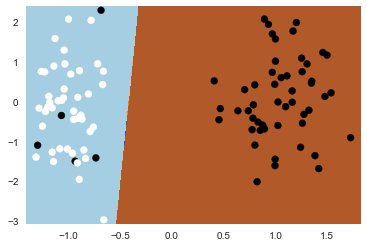

In [18]:
# skru ac interaktive plot
% matplotlib inline

plt.figure() # ny figur
plot_boundary(example_data[['0','1']],clf_log,padding=0.1,plot_step=0.005) # tegne grense
plt.scatter(example_data[['0']], example_data[['1']], marker='o', c=example_data['2']) # tegne scatterplot
plt.show()


Siden logistisk regresjon alltid terskler, hvilket fungerer som et slags "kutt", så vil beslutningsgrensa **alltid bli en rett strek**. 

## Logistisk regresjon i kode

Scikit learn har en ferdig pakke for logistisk regresjon også. Den heter `LogisticRegression` og importeres fra `sklearn.linear_model`. Du kan lage en logistisk regresjon klassifikator med `LogisticRegression()` og trene den som før med `.fit(x,y)`

**Oppgave 8** Tren en logistisk regresjon kode på irisdatasettet. 

*Irisdatasettet er et datasett med egenskaper for klassifisering av irisblomster. Datasettet ble først introdusert av en biolog og matematiker ved navn Ronald Fisher i 1936 og har siden den gang blitt brukt gjentatte ganger for å teste og visualisere maskinlæringsteknikker. Hvis du vil vite mer om irisdatasettet kan du lese mer <a href="https://en.wikipedia.org/wiki/Iris_flower_data_set">her</a>. Nå er det din tur til å gå i generasjoner med maskinlæringsekseperter sine fotspor og prøve å klassifisere irisblomstene ut fra lengde og bredde på kronbladene *

**Hint:**
Første steg er å lese inn datasettet fra `'..\..\datasets\iris-species\Iris.csv'`og hente ut kollonene med egenskapene `SepalWidthCm` og `PetalLengthCm`. Du må også hente ut kollonen `'Species'` som inneholder klassen. Så må du splitte opp i trening og testdata. Deretter er koden ganske lik som det vi gjorde for KNN, men husk å importere og bruke LogisticRegression. 



In [19]:
###### din kode her: ######




In [20]:
df2 = read_csv('..\..\datasets\iris-species\Iris.csv')

data_use= df2[['PetalWidthCm','PetalLengthCm']]
target = df2['Species']

In [21]:
# Laste inn data
iris = load_iris() #TODO: kanskje lagre som csv og laste inn på samme måte som før for å være konsekvent
F1,F2 = 2,3 
data = iris.data[:,[F1,F2]]

# splitte inn i trenings og testdata
train_data, test_data,train_target, test_target = train_test_split(data_use, target, test_size=0.33, random_state=54)

# lage og trene en KNN klassifikator med k=10
clf = LogisticRegression()
clf.fit(train_data,train_target)

# tegne plot
plt.figure() # ny figur
plot_boundary(data_use,clf,padding=0.1,plot_step=0.005) # tegn opp beslutningsgrensa
plt.scatter(train_data['PetalWidthCm'], train_data['PetalLengthCm'], marker='o', c=train_target) # tegn treningsdata med sirkler
plt.scatter( test_data['PetalWidthCm'],  test_data['PetalLengthCm'], marker='x', c=test_target) # tegn testdata med kryss
plt.show() # vis fram figuren

#TODO: bruke hjelpefunksjon for å skrive ut trening og testnøyaktighet
print ("treningsnøyaktighet: ",np.mean(clf.predict(train_data)==train_target))
print ("testnøyaktighet: ",np.mean(clf.predict(test_data)==test_target))

NameError: name 'load_iris' is not defined

**Oppgave 9** Kjør koden fra oppgave 8 på nytt, men test ut andre par med egenskaper. Hvilke skiller best ut iristypene?